In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [36]:
#Carregar Datasets
df = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

df_test = df_test.reset_index()


## Deixar as colunas iguais para datasets train e test 

In [37]:
tran_column = df.columns
test_column = df_test.columns

y_train_column = df['IN_TREINEIRO']

columns = list(set(tran_column) & set(test_column))

df = df[columns]
#Recolocando a coluna Y após correção das colunas dos datasets
df['IN_TREINEIRO'] = y_train_column

# PRÉ PROCESSAMENTO

Removendo colunas com base nas informações do dicionário de Microdados ENEN_2016

In [38]:
df.head()

,Q001,IN_DISCALCULIA,TP_PRESENCA_CN,Q026,NU_NOTA_COMP1,Q027,TP_COR_RACA,IN_BAIXA_VISAO,Q006,IN_GESTANTE,...,Q024,TP_LINGUA,Q047,IN_IDOSO,TP_STATUS_REDACAO,SG_UF_RESIDENCIA,NU_NOTA_LC,NU_NOTA_REDACAO,Q025,IN_TREINEIRO
1,D,0,1,C,120.0,H,1,0,C,0,...,A,1,A,0,1.0,RS,581.2,520.0,A,0
2,A,0,1,A,140.0,NaN,3,0,B,0,...,A,1,A,0,1.0,CE,599.0,580.0,A,0
3,D,0,0,A,NaN,NaN,3,0,C,0,...,A,1,A,0,NaN,CE,NaN,NaN,A,0
4,H,0,0,C,NaN,F,0,0,E,0,...,C,0,D,0,NaN,RJ,NaN,NaN,B,0
5,E,0,0,B,NaN,F,2,0,C,0,...,A,1,A,0,NaN,AM,NaN,NaN,A,0


In [39]:
columns_to_remove = ['CO_UF_RESIDENCIA', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
                     'IN_DISCALCULIA', 'IN_DISLEXIA', 'IN_GESTANTE',
                     'IN_IDOSO', 'IN_SABATISTA', 'IN_SURDEZ',
                     'TP_LINGUA', 'NU_INSCRICAO', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC'
                    ]


df = df.drop(columns_to_remove, axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13730 entries, 1 to 4586
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Q001                    13730 non-null  object 
 1   TP_PRESENCA_CN          13730 non-null  int64  
 2   Q026                    13730 non-null  object 
 3   NU_NOTA_COMP1           10133 non-null  float64
 4   Q027                    6357 non-null   object 
 5   TP_COR_RACA             13730 non-null  int64  
 6   Q006                    13730 non-null  object 
 7   NU_IDADE                13730 non-null  int64  
 8   TP_SEXO                 13730 non-null  object 
 9   NU_NOTA_CN              10341 non-null  float64
 10  Q002                    13730 non-null  object 
 11  TP_ST_CONCLUSAO         13730 non-null  int64  
 12  TP_NACIONALIDADE        13730 non-null  int64  
 13  TP_ENSINO               4282 non-null   float64
 14  NU_NOTA_COMP4           10133 non-null 

In [41]:
aux = pd.DataFrame({'colunas': df.columns,
                    'tipos': df.dtypes,
                    'percent_faltante': df.isna().sum() / df.shape[0],
                    'uniques': df.nunique(),
                   })

aux

,colunas,tipos,percent_faltante,uniques
Q001,Q001,object,0.000000,8
TP_PRESENCA_CN,TP_PRESENCA_CN,int64,0.000000,3
Q026,Q026,object,0.000000,3
NU_NOTA_COMP1,NU_NOTA_COMP1,float64,0.261981,15
Q027,Q027,object,0.536999,13
TP_COR_RACA,TP_COR_RACA,int64,0.000000,6
Q006,Q006,object,0.000000,17
NU_IDADE,NU_IDADE,int64,0.000000,55
TP_SEXO,TP_SEXO,object,0.000000,2
NU_NOTA_CN,NU_NOTA_CN,float64,0.246832,2692


In [42]:
unique_values = aux.loc[aux['uniques'] == 1].sort_values(by='uniques').index
high_nan_count = aux.loc[aux['percent_faltante'] > 0.20].sort_values(by='percent_faltante').index

print('Qte. de colunas valores únicos: {0}'.format(unique_values.shape))
print('Qte. de colunas com mais de 20% de dados faltantes: {0}'.format(high_nan_count.shape))


columns_to_drop = list(set(high_nan_count) | set(unique_values))
print('Total colinas à excluir: {0}'.format(len(columns_to_drop)))

df = df.drop(columns_to_drop, axis=1)

Qte. de colunas valores únicos: (0,)
Qte. de colunas com mais de 20% de dados faltantes: (13,)
Total colinas à excluir: 13


## Variáveis Categóricas

In [43]:
variaveis_categoricas = df.select_dtypes(include='object').columns
df[variaveis_categoricas].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13730 entries, 1 to 4586
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Q001              13730 non-null  object
 1   Q026              13730 non-null  object
 2   Q006              13730 non-null  object
 3   TP_SEXO           13730 non-null  object
 4   Q002              13730 non-null  object
 5   Q024              13730 non-null  object
 6   Q047              13730 non-null  object
 7   SG_UF_RESIDENCIA  13730 non-null  object
 8   Q025              13730 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


## Variáveis Numéricas

In [47]:
df.select_dtypes(include='number').columns

Index(['TP_PRESENCA_CN', 'TP_COR_RACA', 'NU_IDADE', 'TP_ST_CONCLUSAO',
       'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_PRESENCA_CH', 'TP_ESCOLA',
       'IN_TREINEIRO'],
      dtype='object')

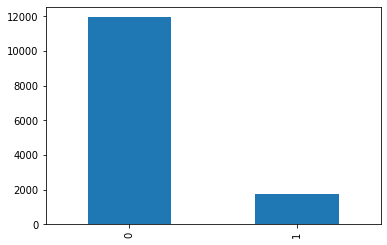

In [48]:
df['IN_TREINEIRO'].value_counts().plot(kind='bar')

In [49]:
smote = SMOTE(sampling_strategy="minority")

df = pd.get_dummies(df)

X, y = smote.fit_resample(df.iloc[:,:-1], df['IN_TREINEIRO'])

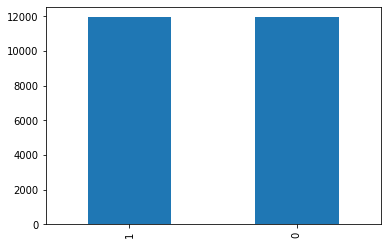

In [57]:
y.value_counts().plot(kind='bar')

In [60]:
X = X.drop('IN_TREINEIRO', axis=1)

## Transformando os dados

In [61]:
minmax = MinMaxScaler()

X_pred = df_test
X_pred = pd.get_dummies(X_pred)

columns = list(set(X.columns) & set(X_pred.columns))

X = X[columns]
X_pred = X_pred[columns]



In [62]:
X = minmax.fit_transform(X)
X_pred = minmax.transform(X_pred)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

## Prevendo os dados de teste

In [64]:
y_pred = random_forest.predict(X_pred)

In [65]:
answer = pd.DataFrame({'NU_INSCRICAO': df_test['NU_INSCRICAO'].values, 'IN_TREINEIRO': y_pred})
answer.to_csv('answer.csv', encoding='utf-8', index=False)